Import libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt


Load the Titanic dataset

In [31]:
titanic_df = pd.read_csv('Titanic dataset.csv')

Display the first few rows of the dataset

In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Display basic info about the dataset

In [33]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [34]:
# Check missing values in the dataset
missing_data = titanic_df.isnull().sum()

# Print missing data count
print(missing_data)

# For simplicity, let's fill missing values for Age with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Embarked has only two missing values, so let's fill it with the mode (most frequent value)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Cabin has too many missing values, so we can drop it for now
titanic_df.drop(columns=['Cabin'], inplace=True)

# Confirm there are no more missing values
titanic_df.isnull().sum()


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


C:\Users\Rasagna\AppData\Local\Temp\ipykernel_21700\799779766.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
C:\Users\Rasagna\AppData\Local\Temp\ipykernel_21700\799779766.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [35]:
# Convert 'Sex' column to categorical (0 for male, 1 for female)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to a categorical variable with numerical encoding
titanic_df['Embarked'] = titanic_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Check the updated data types
titanic_df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

In [36]:
# Check for duplicates
titanic_df.duplicated().sum()

# Remove duplicates if any
titanic_df = titanic_df.drop_duplicates()


In [37]:
# Summary statistics for numerical columns
titanic_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.377387,2.294882,0.355997,29.503186,0.498854,0.385027,33.295479,1.493506
std,378.020061,0.484918,0.837836,0.478997,12.905241,1.041658,0.865560,51.758668,0.814244
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,655.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,982.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,2.000000
max,1309.000000,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000


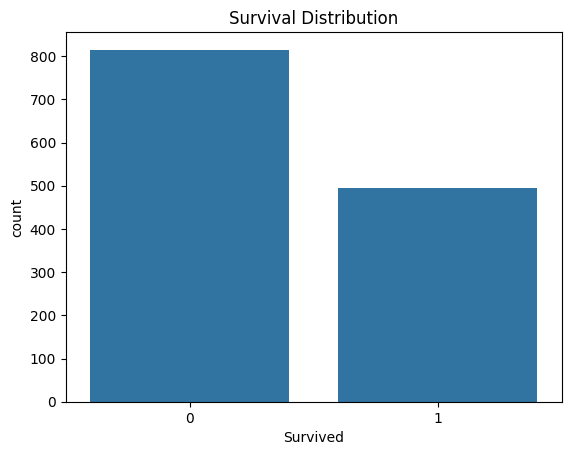

In [38]:
# Distribution of survival (1 = survived, 0 = not survived)
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Distribution')
plt.show()

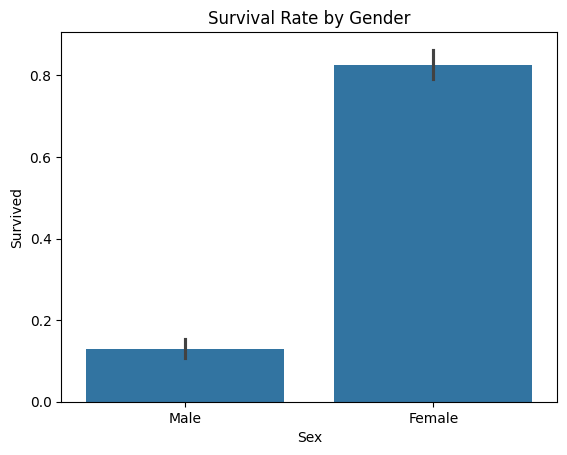

In [39]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

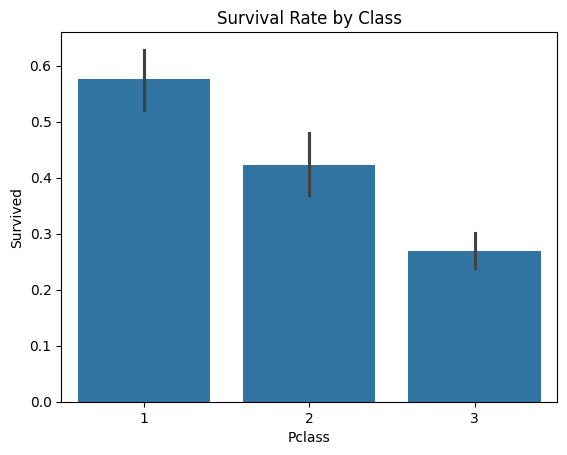

In [40]:
# Survival rate by class (Pclass)
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Class')
plt.show()

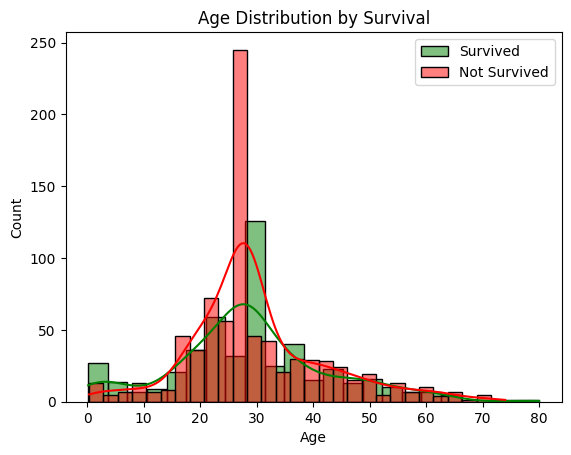

In [41]:
# Survival rate by Age
sns.histplot(titanic_df[titanic_df['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')
sns.histplot(titanic_df[titanic_df['Survived'] == 0]['Age'], kde=True, color='red', label='Not Survived')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

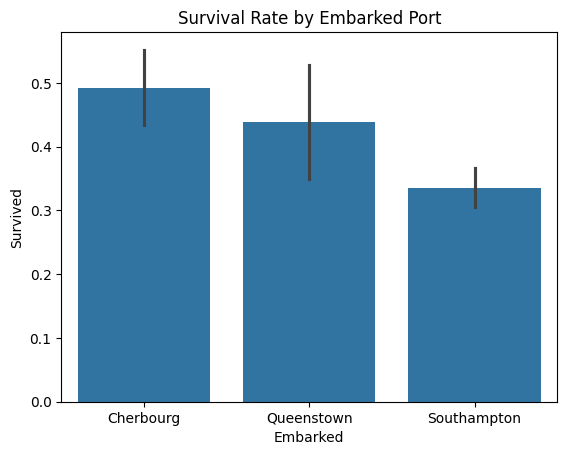

In [42]:
# Survival by Embarked
sns.barplot(x='Embarked', y='Survived', data=titanic_df)
plt.title('Survival Rate by Embarked Port')
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'])
plt.show()

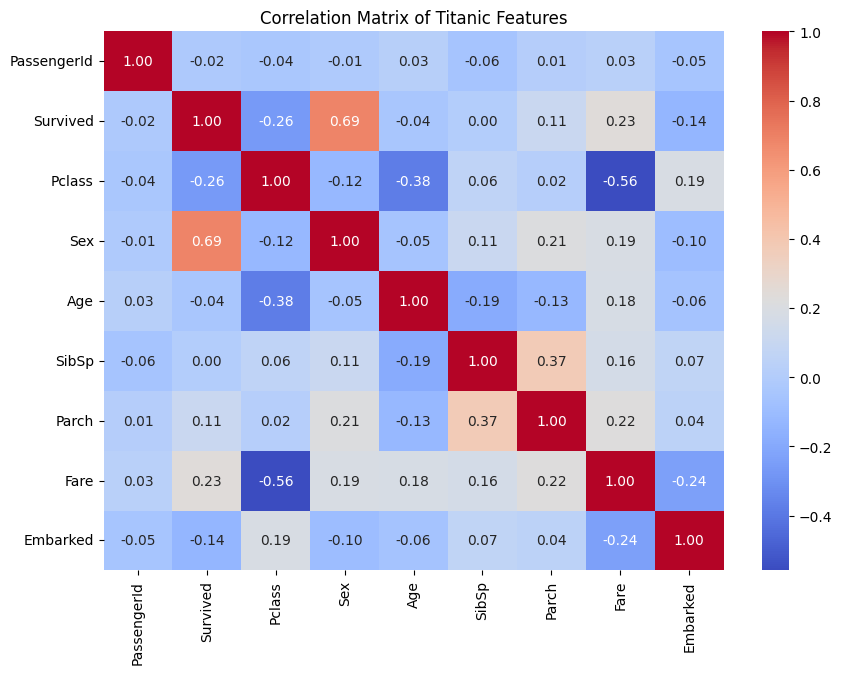

In [43]:
# Select only numerical columns for the correlation matrix
numeric_df = titanic_df.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Titanic Features')
plt.show()


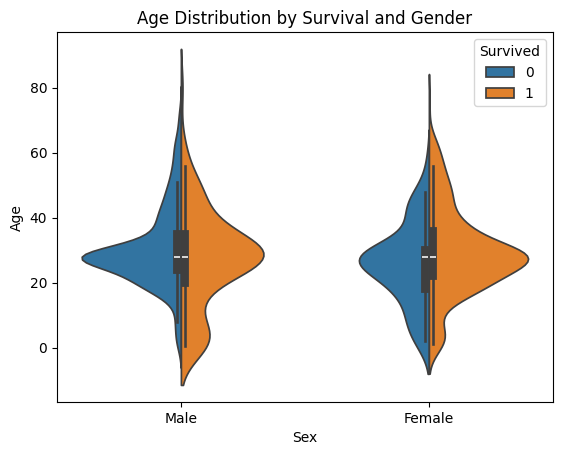

In [44]:
# Explore how age affects survival, by gender
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_df, split=True)
plt.title('Age Distribution by Survival and Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()


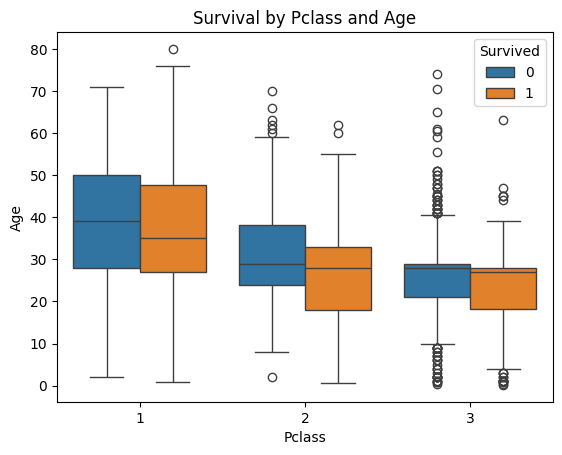

In [45]:
# Explore survival by Pclass and Age
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=titanic_df)
plt.title('Survival by Pclass and Age')
plt.show()
